In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("../data/notifications.csv", names=["timestamp", "to_id", "from_id", "from_name"])

In [3]:
data["timestamp"] = data["timestamp"].apply(lambda string: datetime.datetime.strptime(string, '%Y-%m-%d  %H:%M:%S'))
data.sort_values(by="timestamp", inplace=True)
# print(repr(data.values[0][0]))
# datetime.strptime(data.values[0][0], '%Y-%m-%d  %H:%M:%S')

In [4]:
ration = int(0.8 * len(data))
train = data[:ration]
test = data[ration:]

In [5]:
len(train), len(test)

(270125, 67532)

In [6]:
# test["timestamp"]=test["timestamp"].apply(lambda dt:dt.strftime('%Y-%m-%d  %H:%M:%S'))
# test.to_csv("test.csv", index=False, header=False)

In [7]:
freq = train.groupby(["to_id"]).size().values
print(np.mean(freq), np.std(freq))

20.247732553781574 115.72312456633972


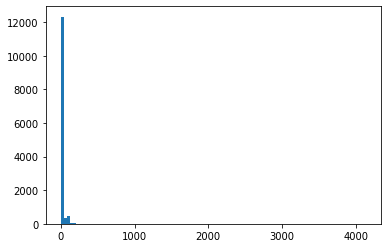

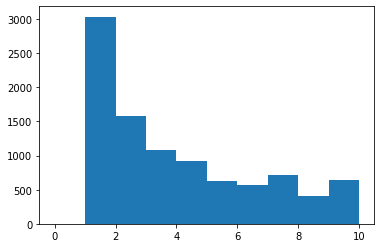

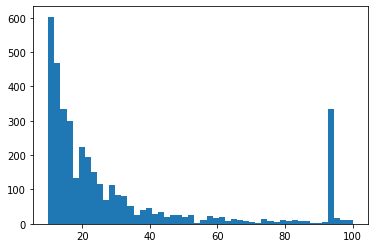

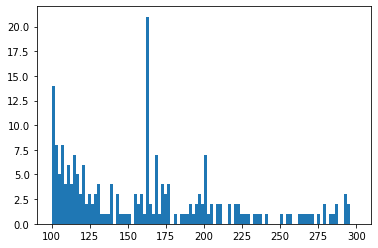

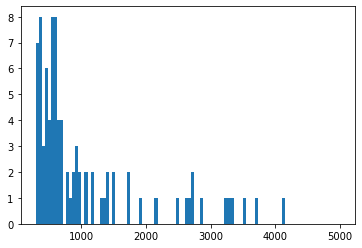

In [8]:
plt.hist(freq, bins=100)
plt.show()
plt.hist(freq, bins=10, range=(0, 10))
plt.show()
plt.hist(freq, bins=50, range=(10, 100))
plt.show()
plt.hist(freq, bins=100, range=(100, 300))
plt.show()
plt.hist(freq, bins=100, range=(300, 5000))
plt.show()

In [9]:
df_from = train[["from_id", "timestamp"]].drop_duplicates()
freq_from = df_from.groupby(["from_id", ]).size()

In [10]:
freq_from.sort_values()

from_id
7400AE58CCD220697BC3C4D093B0B2       1
77B6B5309D2051EF9FA9345E1877EA       1
F4053F67D7C5576156E31B5B9F4AFD       1
77A744BC0A2AEA25A4E7C591CA4697       1
77A5A90887C22BA5EECD5AB829B86F       1
                                  ... 
998E2981FC0E70F520371707F53CA6     273
E7B1E7E06FFA74BBE5DF939018AAEA     284
72C688FB41B4EDE06DBC790020FBE7     305
87549ADEF37C1ED062AC9220B543E5     370
DACE6D3C78D9B20B1F70A271BA98D5    1941
Length: 16891, dtype: int64

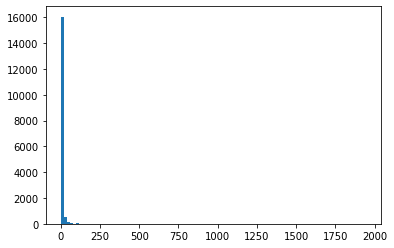

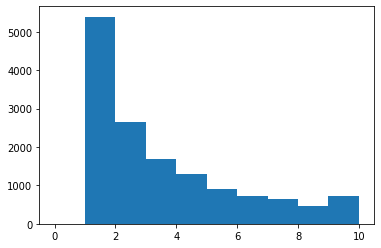

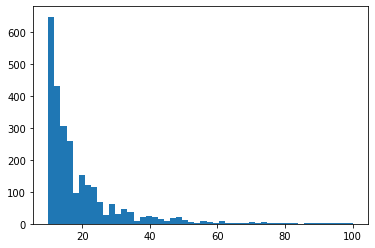

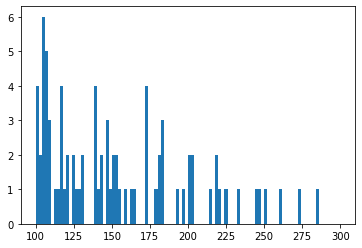

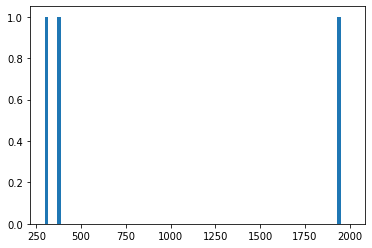

In [11]:
plt.hist(freq_from, bins=100)
plt.show()
plt.hist(freq_from, bins=10, range=(0, 10))
plt.show()
plt.hist(freq_from, bins=50, range=(10, 100))
plt.show()
plt.hist(freq_from, bins=100, range=(100, 300))
plt.show()
plt.hist(freq_from, bins=100, range=(300, 2000))
plt.show()

In [12]:
times = df_from.timestamp.apply(lambda dt: dt.time().hour * 60 + dt.time().minute)

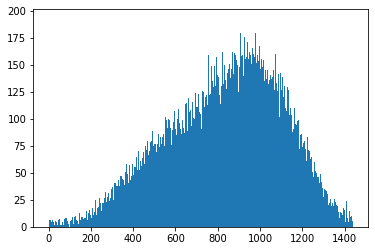

In [13]:
plt.hist(times, bins=24 * 60)
plt.show()

In [14]:
np.quantile(times, [0.25, 0.5, 0.75]) / 60

array([10.7 , 14.35, 17.3 ])

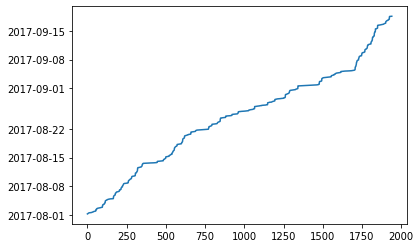

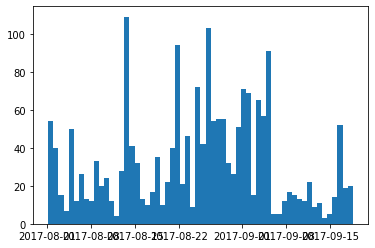

In [15]:
tmp_times = df_from[df_from.from_id == "DACE6D3C78D9B20B1F70A271BA98D5"].timestamp
plt.plot(tmp_times.values)
plt.show()
plt.hist(tmp_times.values, bins=60)
plt.show()

In [16]:
mean_freq = {}
min_number = {}
train["date"] = train["timestamp"].apply(lambda dt: dt.date())
for user_id, group in train.groupby(["to_id"]):
    mail_pro_day = group.groupby(["date"]).size().values
    # print(user_id, mail_pro_day)
    mean_freq[user_id] = np.mean(mail_pro_day)
    min_number[user_id] = np.min(mail_pro_day)

/var/folders/gd/scvpylb17pq64d56gxlfshx00000gn/T/ipykernel_46333/3456817511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["date"] = train["timestamp"].apply(lambda dt: dt.date())


In [17]:
user_id = "0005BDD51B0185DCF1A4932CEB8437"
train[train["to_id"] == user_id]

,timestamp,to_id,from_id,from_name,date
1532,2017-08-01 12:09:25,0005BDD51B0185DCF1A4932CEB8437,FB63F29610B1EF67AD75C4BABDFCE1,Sara,2017-08-01
2034,2017-08-01 12:34:51,0005BDD51B0185DCF1A4932CEB8437,FB63F29610B1EF67AD75C4BABDFCE1,Sara,2017-08-01
2513,2017-08-01 12:55:33,0005BDD51B0185DCF1A4932CEB8437,FB63F29610B1EF67AD75C4BABDFCE1,Sara,2017-08-01
2962,2017-08-01 13:01:50,0005BDD51B0185DCF1A4932CEB8437,FB63F29610B1EF67AD75C4BABDFCE1,Sara,2017-08-01
3567,2017-08-01 13:45:58,0005BDD51B0185DCF1A4932CEB8437,FB63F29610B1EF67AD75C4BABDFCE1,Sara,2017-08-01
...,...,...,...,...,...
256446,2017-09-15 16:42:04,0005BDD51B0185DCF1A4932CEB8437,0B56C34B2BB9B80100D1D5B5AB74EA,Rameshwor,2017-09-15
256888,2017-09-15 18:07:47,0005BDD51B0185DCF1A4932CEB8437,0B56C34B2BB9B80100D1D5B5AB74EA,Rameshwor,2017-09-15
260702,2017-09-16 15:52:34,0005BDD51B0185DCF1A4932CEB8437,DACE6D3C78D9B20B1F70A271BA98D5,Julie,2017-09-16
264098,2017-09-17 11:23:02,0005BDD51B0185DCF1A4932CEB8437,0B56C34B2BB9B80100D1D5B5AB74EA,Rameshwor,2017-09-17


In [18]:
mean_freq = {}
min_number = {}
df_from["date"] = df_from["timestamp"].apply(lambda dt: dt.date())
for user_id, group in df_from.groupby(["from_id"]):
    mail_pro_day = group.groupby(["date"]).size().values
    # print(user_id, mail_pro_day)
    mean_freq[user_id] = np.mean(mail_pro_day)
    min_number[user_id] = np.min(mail_pro_day)

In [19]:
user_id = "014513DF37B10C0B1979C5B2A05E7B"
df_from[df_from["from_id"] == user_id]

,from_id,timestamp,date
3195,014513DF37B10C0B1979C5B2A05E7B,2017-08-01 13:36:20,2017-08-01
52190,014513DF37B10C0B1979C5B2A05E7B,2017-08-10 12:06:29,2017-08-10
52206,014513DF37B10C0B1979C5B2A05E7B,2017-08-10 12:09:22,2017-08-10
52283,014513DF37B10C0B1979C5B2A05E7B,2017-08-10 12:30:39,2017-08-10
76435,014513DF37B10C0B1979C5B2A05E7B,2017-08-13 18:40:39,2017-08-13
79560,014513DF37B10C0B1979C5B2A05E7B,2017-08-14 12:46:16,2017-08-14
115265,014513DF37B10C0B1979C5B2A05E7B,2017-08-21 05:16:11,2017-08-21
154190,014513DF37B10C0B1979C5B2A05E7B,2017-08-28 05:03:28,2017-08-28
164961,014513DF37B10C0B1979C5B2A05E7B,2017-08-29 23:00:43,2017-08-29
261492,014513DF37B10C0B1979C5B2A05E7B,2017-09-16 17:38:05,2017-09-16
